## Final Report Analysis

In [1]:
set.seed(999)
options(repr.plot.width = 15, repr.plot.height = 8, warn = -1) 
library(tidyverse)
library(repr)
col <- c("#004d8d", "#cc2701", "#e5b400", "#999999")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# dataframe
Df<- read_csv("/home/jupyter/BIOL342-Project/Data/BIOL342_BMusselData.csv", show_col_types = FALSE)
head(Df, n = 3)

GeneralL,LabelID,BandBP,SpeciesID,Length.mm,Width.mm,Height.mm,Coloration,Slope.degree,Aspect.degree
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
South,S01,126,M.galloprovincialis,19.40,11.72,7.53,blue/black,28,201
South,S02,180,M. edulis,13.94,7.91,5.60,blue/black,40,166
South,S03,x,Unidentified,24.48,13.17,9.19,blue/black,41,182


In [3]:
# df for species count for each location
dfSpecieGraph <- Df |>
select(GeneralL, SpeciesID) |>
mutate(SpeciesID = factor(SpeciesID, levels = c("M. edulis", "M. trossulus", "M.galloprovincialis", "Unidentified"))) %>%
count(GeneralL, SpeciesID, .drop = FALSE) 

head(dfSpecieGraph, n = 5)

GeneralL,SpeciesID,n
<chr>,<fct>,<int>
East,M. edulis,0
East,M. trossulus,2
East,M.galloprovincialis,4
East,Unidentified,4
North,M. edulis,0


In [4]:
dfSpecieGraph %>%
filter(GeneralL == 'East')

Df %>%
filter(GeneralL == 'East')


GeneralL,SpeciesID,n
<chr>,<fct>,<int>
East,M. edulis,0
East,M. trossulus,2
East,M.galloprovincialis,4
East,Unidentified,4


GeneralL,LabelID,BandBP,SpeciesID,Length.mm,Width.mm,Height.mm,Coloration,Slope.degree,Aspect.degree
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
East,E01,x,Unidentified,18.85,10.25,8.18,blue/black,20,93
East,E02,x,Unidentified,18.08,9.76,6.70,blue/black,20,81
East,E03,x,Unidentified,21.74,11.77,8.69,blue/black,44,110
East,E04,126,M.galloprovincialis,10.51,6.54,4.32,gold/brown,43,110
East,E05,168,M. trossulus,8.57,5.24,3.96,blue/black,38,73
East,E06,126,M.galloprovincialis,12.69,7.06,5.31,blue/black,28,110
East,E07,168,M. trossulus,11.20,6.85,4.39,blue/black,23,88
East,E08,126,M.galloprovincialis,15.66,8.81,6.39,blue/black,51,101
East,E09,126,M.galloprovincialis,15.84,8.57,6.63,blue/black,50,112


In [5]:
# # species count for each location - dodge
# SpeciePlotDodge <- dfSpecieGraph %>%
#     ggplot(aes(x = GeneralL, y = n, fill = SpeciesID)) +
#     geom_bar(stat = 'identity', alpha = 0.8, width = 0.8, position = position_dodge(preserve = "single")) +
#     scale_y_continuous(breaks=seq(0,20,1)) +  
#     scale_fill_manual(values = col, labels = c("*M. edulis*", "*M. trossulus*", "*M.galloprovincialis*", "Unidentified")) +
#     labs(x = 'Aspect', y = 'Count', fill = 'Species Identified') +
#     theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14, family="arial"), legend.text = ggtext::element_markdown(size=12, family="arial"),
#           axis.text=element_text(size=14, family="arial"), axis.title=element_text(size=14, family="arial")) 

# SpeciePlotDodge

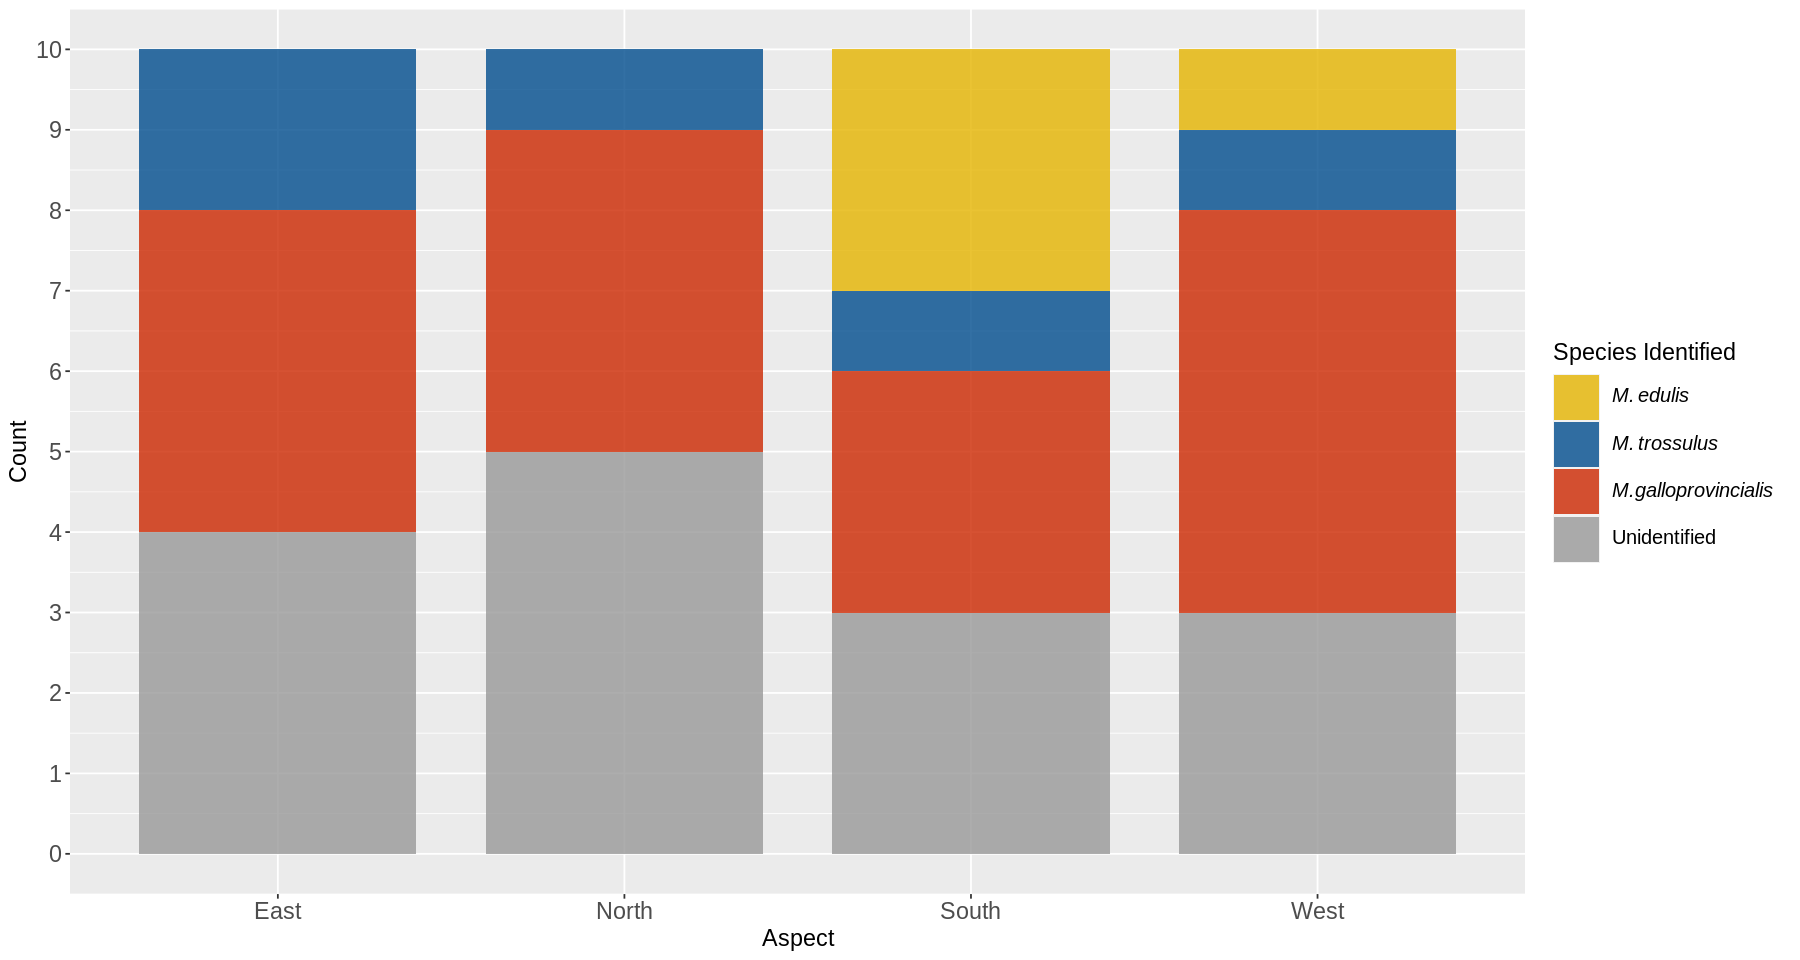

In [7]:
# species count for each location - stacked
col <- c("#004d8d", "#cc2701", "#e5b400", "#999999")
# blue, #red, #yellow # grey
# ME, MT, MG, UN
col <- c("#e5b400", "#004d8d", "#cc2701", "#999999")
SpeciePlotStack <- dfSpecieGraph %>%
    ggplot(aes(x = GeneralL, y = n, fill = SpeciesID)) +
    geom_bar(stat = 'identity', alpha = 0.8, width = 0.8, position = 'stack') +
    scale_y_continuous(breaks=seq(0,20,1)) +  
    scale_fill_manual(values = col, labels = c("*M. edulis*", "*M. trossulus*", "*M.galloprovincialis*", "Unidentified")) +
    labs(x = 'Aspect', y = 'Count', fill = 'Species Identified') +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14, family="arial"), legend.text = ggtext::element_markdown(size=12, family="arial"),
          axis.text=element_text(size=14, family="arial"), axis.title=element_text(size=14, family="arial")) 

# MT to blue, 
# ME to yellow
# MG to red
SpeciePlotStack

In [9]:
## Fig 2 Testing

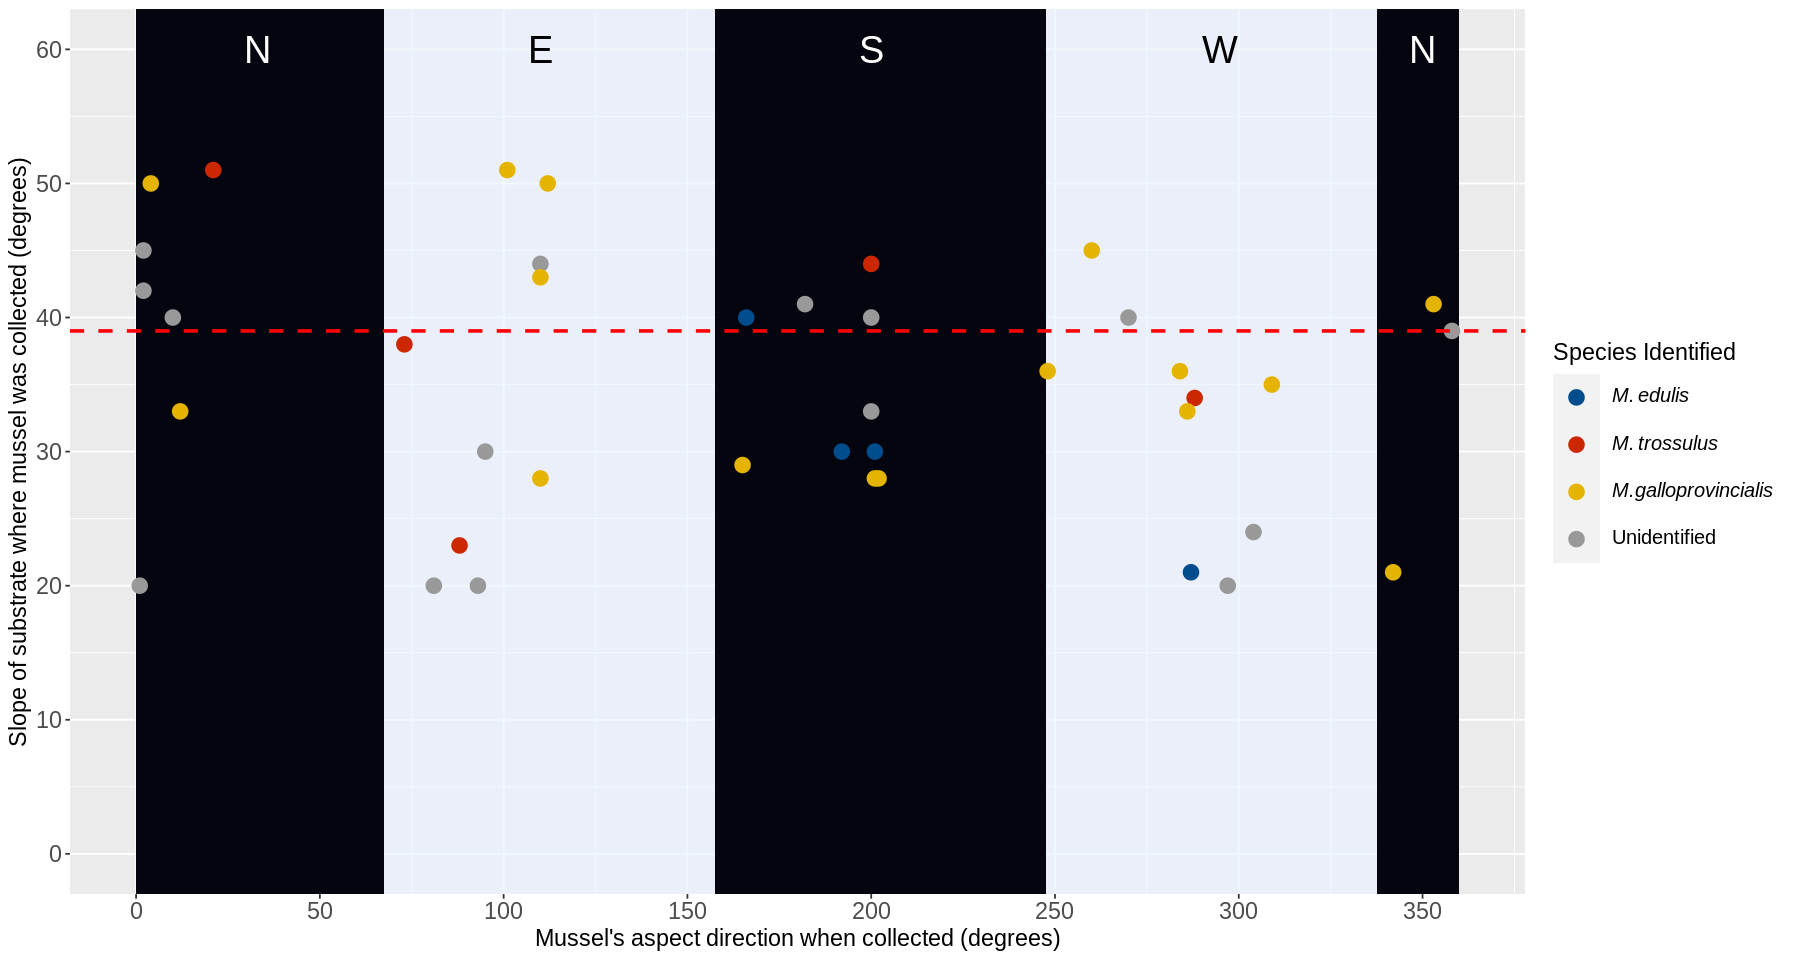

In [10]:
# if using all data (kinda overwhelming)
slopevsaspectscatter <- Df %>%
    ggplot() +
    geom_rect(aes(xmin = 0,xmax = 67.5, ymin = -Inf, ymax = Inf, fill = 'North'), alpha = .09, fill='#04080F') +
    geom_rect(aes(xmin = 67.5,xmax = 157.5, ymin = -Inf, ymax = Inf, fill = 'East'), alpha = .09, fill='#ECF3FF') +
    geom_rect(aes(xmin = 157.5,xmax = 247.5, ymin = -Inf, ymax = Inf, fill = 'South'), alpha = .09, fill='#04080F') +
    geom_rect(aes(xmin = 247.5,xmax = 337.5, ymin = -Inf, ymax = Inf, fill = 'West'), alpha = .09, fill='#ECF3FF') +
    geom_rect(aes(xmin = 337.5,xmax = 360, ymin = -Inf, ymax = Inf, fill = 'North'), alpha = .09, fill='#04080F') +
    geom_point(aes(x = Aspect.degree, y = Slope.degree, color = SpeciesID), size=4) +
    scale_color_manual(values = col, labels = c("*M. edulis*", "*M. trossulus*", "*M.galloprovincialis*", "Unidentified")) + 
    geom_hline(yintercept=39, linetype="dashed", color = "red", size = 1) +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14, family="arial"), legend.text = ggtext::element_markdown(size=12, family="arial"),
    axis.text=element_text(size=14, family="arial"), axis.title=element_text(size=14, family="arial")) +
    annotate("text", x=33, y=60, label= "N", color = 'white', size = 8) +
    annotate("text", x=110, y=60, label= "E", color = 'black', size = 8) +
    annotate("text", x=200, y=60, label= "S", color = 'white', size = 8) +
    annotate("text", x=295, y=60, label= "W", color = 'black', size = 8) +
    annotate("text", x=350, y=60, label= "N", color = 'white', size = 8) +
    scale_y_continuous(limits = c(0,60), breaks=seq(0,60,10)) +
    scale_x_continuous(limits = c(0,360), breaks=seq(0,360,50)) +
    labs(y = "Slope of substrate where mussel was collected (degrees)", x = "Mussel's aspect direction when collected (degrees)", color = "Species Identified")

slopevsaspectscatter

In [11]:
r <- Df 
r$Sample_Number <- rep(c(1:10), times = 4)

head(r, n = 2)

GeneralL,LabelID,BandBP,SpeciesID,Length.mm,Width.mm,Height.mm,Coloration,Slope.degree,Aspect.degree,Sample_Number
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>
South,S01,126,M.galloprovincialis,19.40,11.72,7.53,blue/black,28,201,1
South,S02,180,M. edulis,13.94,7.91,5.60,blue/black,40,166,2


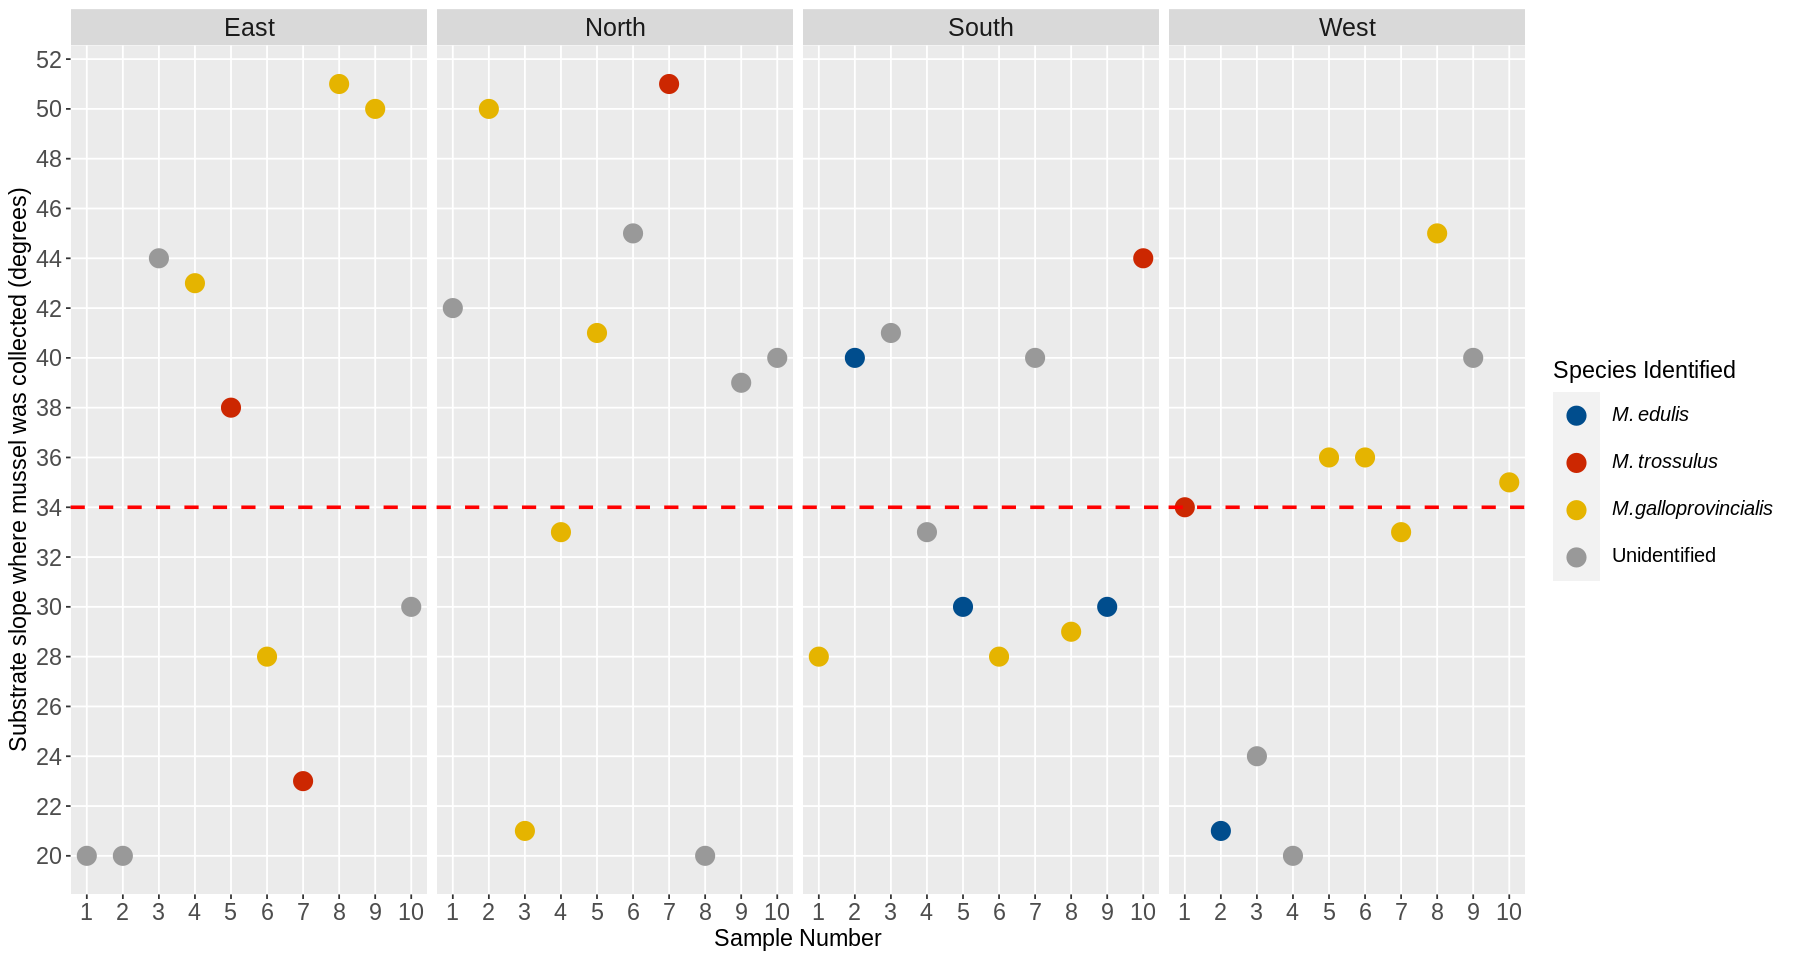

In [12]:
options(repr.plot.width = 15, repr.plot.height = 8, warn = -1) 

t <- r %>%
    ggplot(aes(x = Sample_Number, y = Slope.degree, color = SpeciesID)) +
    # annotate("rect", ymin = 29,ymax = 39, xmin = -Inf, xmax = Inf, alpha = .1, fill='#04080F') +
    geom_point(size=5) +
    facet_grid(~GeneralL) + 
    geom_hline(yintercept=34, linetype="dashed", color = "red", size = 1) +
    scale_x_continuous(limits = c(1,10), breaks=seq(1,10,by = 1)) +
    scale_y_continuous( breaks=seq(10,70,by = 2)) +
    theme(panel.grid.minor = element_blank()) +
    labs(y = "Substrate slope where mussel was collected (degrees)", x = "Sample Number", color = "Species Identified") +
    scale_color_manual(values = col, labels = c("*M. edulis*", "*M. trossulus*", "*M.galloprovincialis*", "Unidentified")) +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14, family="arial"), legend.text = ggtext::element_markdown(size=12, family="arial"),
          axis.text=element_text(size=14, family="arial"), axis.title=element_text(size=14, family="arial"), strip.text.x = element_text(size = 15)) 


t

In [13]:
r <- r %>%
mutate(diffslope = abs(Slope.degree - 34))
head(r)

GeneralL,LabelID,BandBP,SpeciesID,Length.mm,Width.mm,Height.mm,Coloration,Slope.degree,Aspect.degree,Sample_Number,diffslope
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>
South,S01,126,M.galloprovincialis,19.40,11.72,7.53,blue/black,28,201,1,6
South,S02,180,M. edulis,13.94,7.91,5.60,blue/black,40,166,2,6
South,S03,x,Unidentified,24.48,13.17,9.19,blue/black,41,182,3,7
South,S04,x,Unidentified,21.19,11.08,8.16,blue/black,33,200,4,1
South,S05,180,M. edulis,20.94,11.25,7.89,blue/black,30,192,5,4
South,S06,126,M.galloprovincialis,19.99,10.94,7.45,blue/black,28,202,6,6


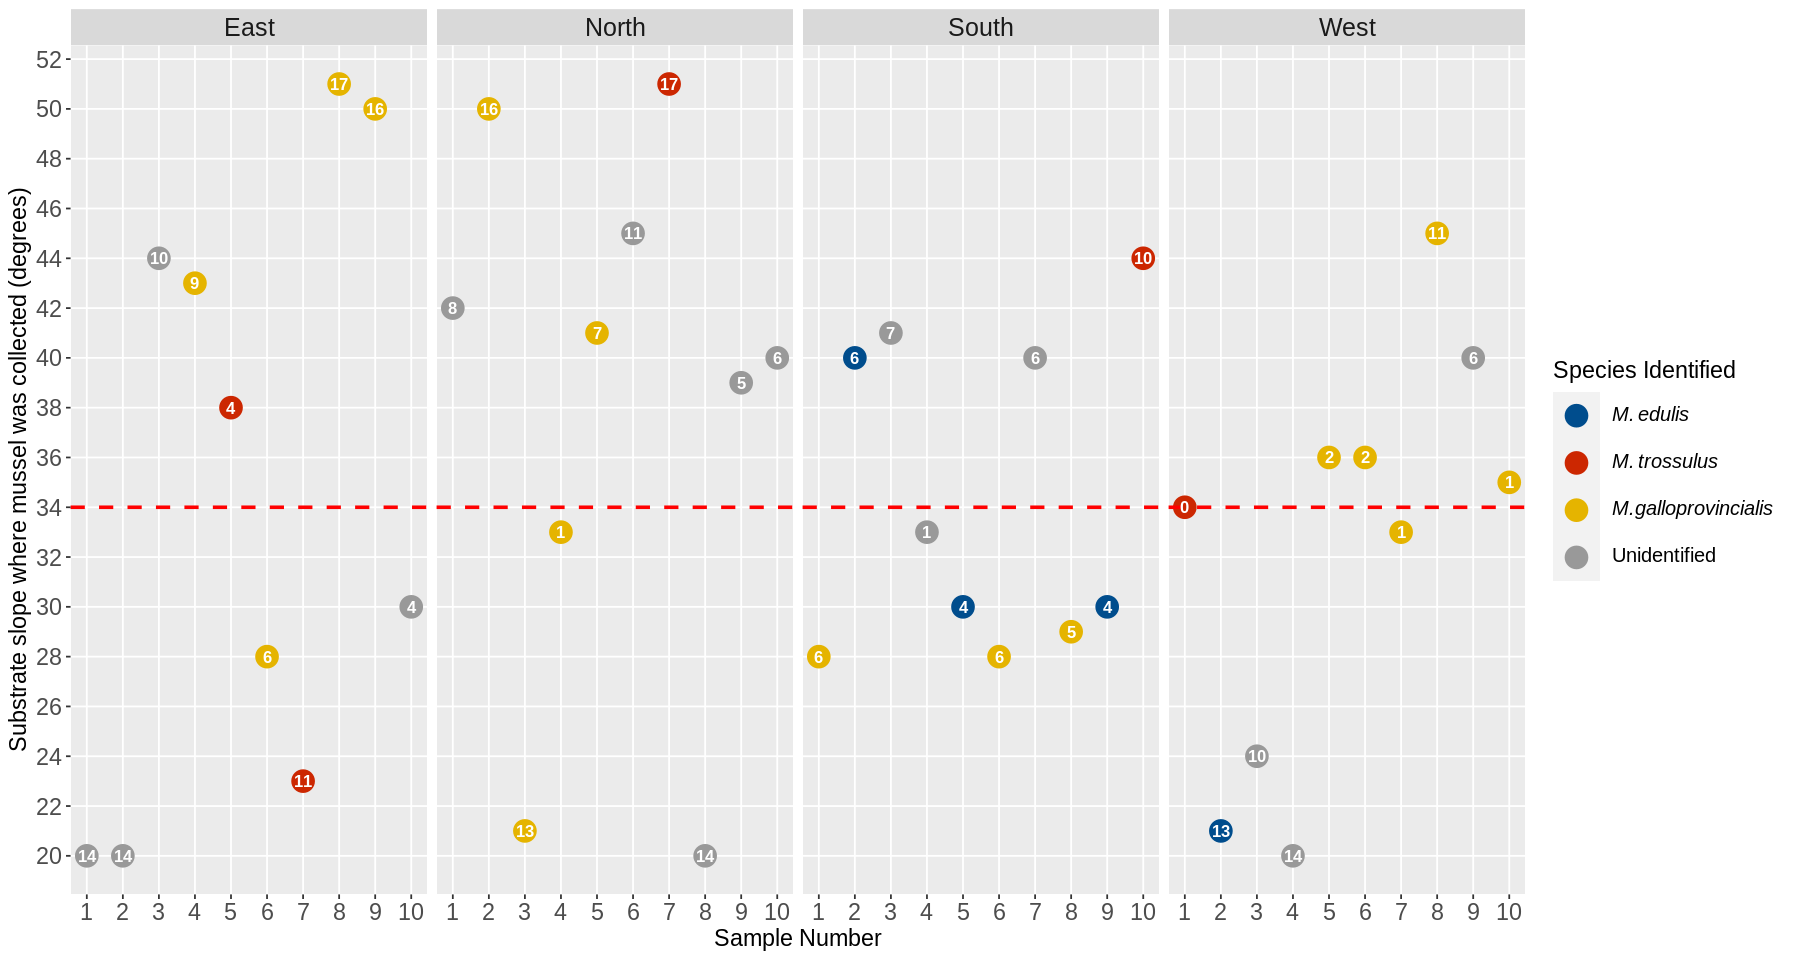

In [14]:
options(repr.plot.width = 15, repr.plot.height = 8, warn = -1) 

t <- r %>%
    ggplot(aes(x = Sample_Number, y = Slope.degree, color = SpeciesID, label = diffslope)) +
    geom_point(size=6) +
    facet_grid(~GeneralL) + 
  #  geom_segment( aes(x=Sample_Number, xend=Sample_Number, y=34, yend=Slope.degree), size = 2) +
    geom_hline(yintercept=34, linetype="dashed", color = "red", size = 1) +
    scale_x_continuous(limits = c(1,10), breaks=seq(1,10,by = 1)) +
    scale_y_continuous( breaks=seq(10,70,by = 2)) +
    theme(panel.grid.minor = element_blank()) +
    labs(y = "Substrate slope where mussel was collected (degrees)", x = "Sample Number", color = "Species Identified") +
    scale_color_manual(values = col, labels = c("*M. edulis*", "*M. trossulus*", "*M.galloprovincialis*", "Unidentified")) +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14, family="arial"), legend.text = ggtext::element_markdown(size=12, family="arial"),
          axis.text=element_text(size=14, family="arial"), axis.title=element_text(size=14, family="arial"), strip.text.x = element_text(size = 15)) +
    geom_text(label= r$diffslope, color = 'white', size = 3.5, fontface = "bold")


t

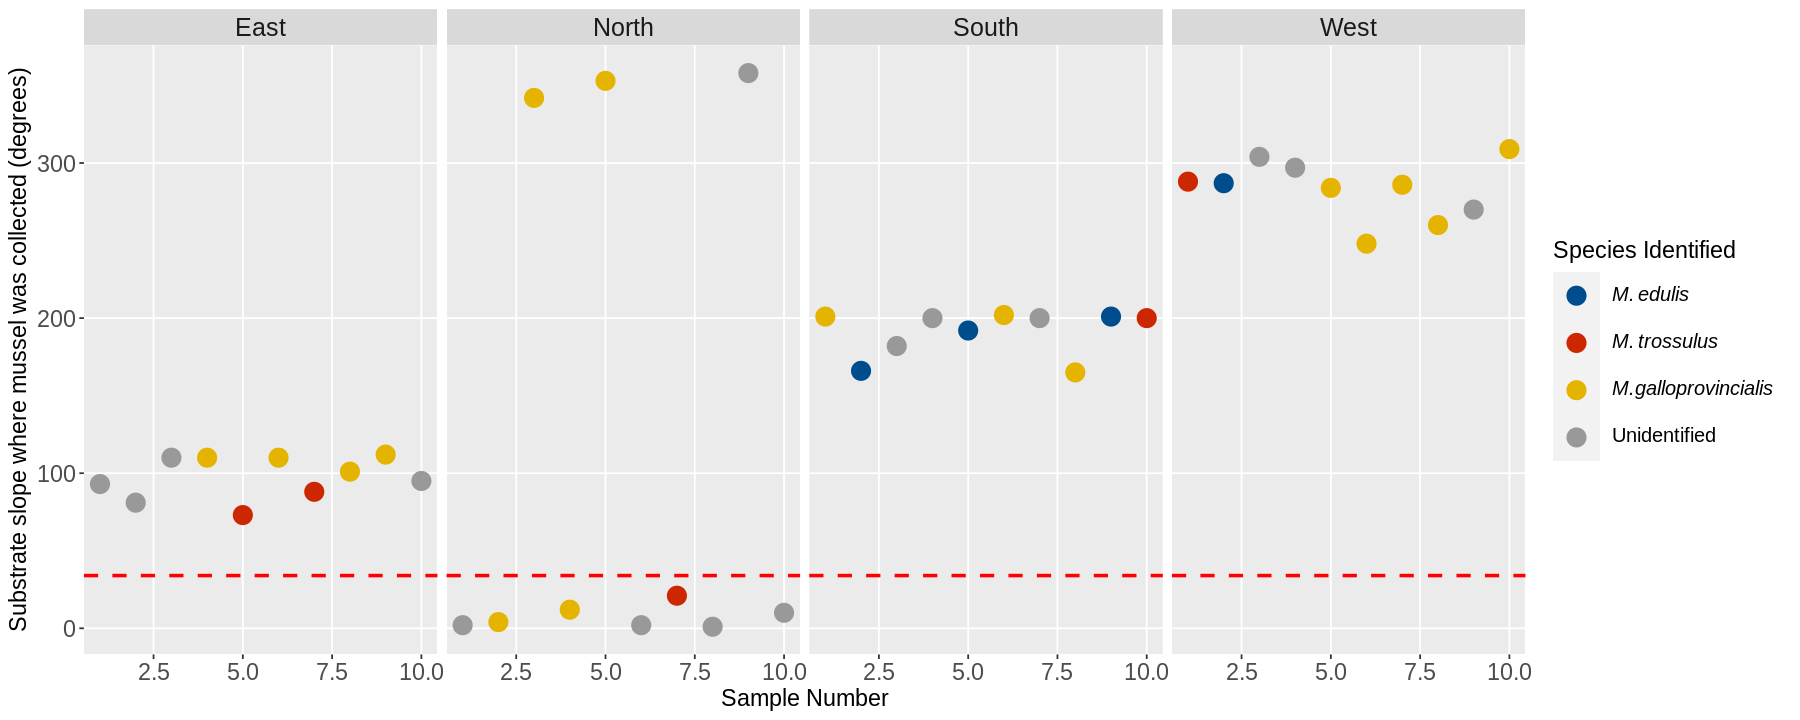

In [15]:
options(repr.plot.width = 15, repr.plot.height = 6, warn = -1) 

t <- r %>%
    ggplot(aes(x = Sample_Number, y = Aspect.degree, color = SpeciesID)) +
    # annotate("rect", ymin = 29,ymax = 39, xmin = -Inf, xmax = Inf, alpha = .1, fill='#04080F') +
    geom_point(size=5) +
    facet_grid(~GeneralL) + 
    geom_hline(yintercept=34, linetype="dashed", color = "red", size = 1) +
    theme(panel.grid.minor = element_blank()) +
    labs(y = "Substrate slope where mussel was collected (degrees)", x = "Sample Number", color = "Species Identified") +
    scale_color_manual(values = col, labels = c("*M. edulis*", "*M. trossulus*", "*M.galloprovincialis*", "Unidentified")) +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14, family="arial"), legend.text = ggtext::element_markdown(size=12, family="arial"),
          axis.text=element_text(size=14, family="arial"), axis.title=element_text(size=14, family="arial"), strip.text.x = element_text(size = 15)) 


t

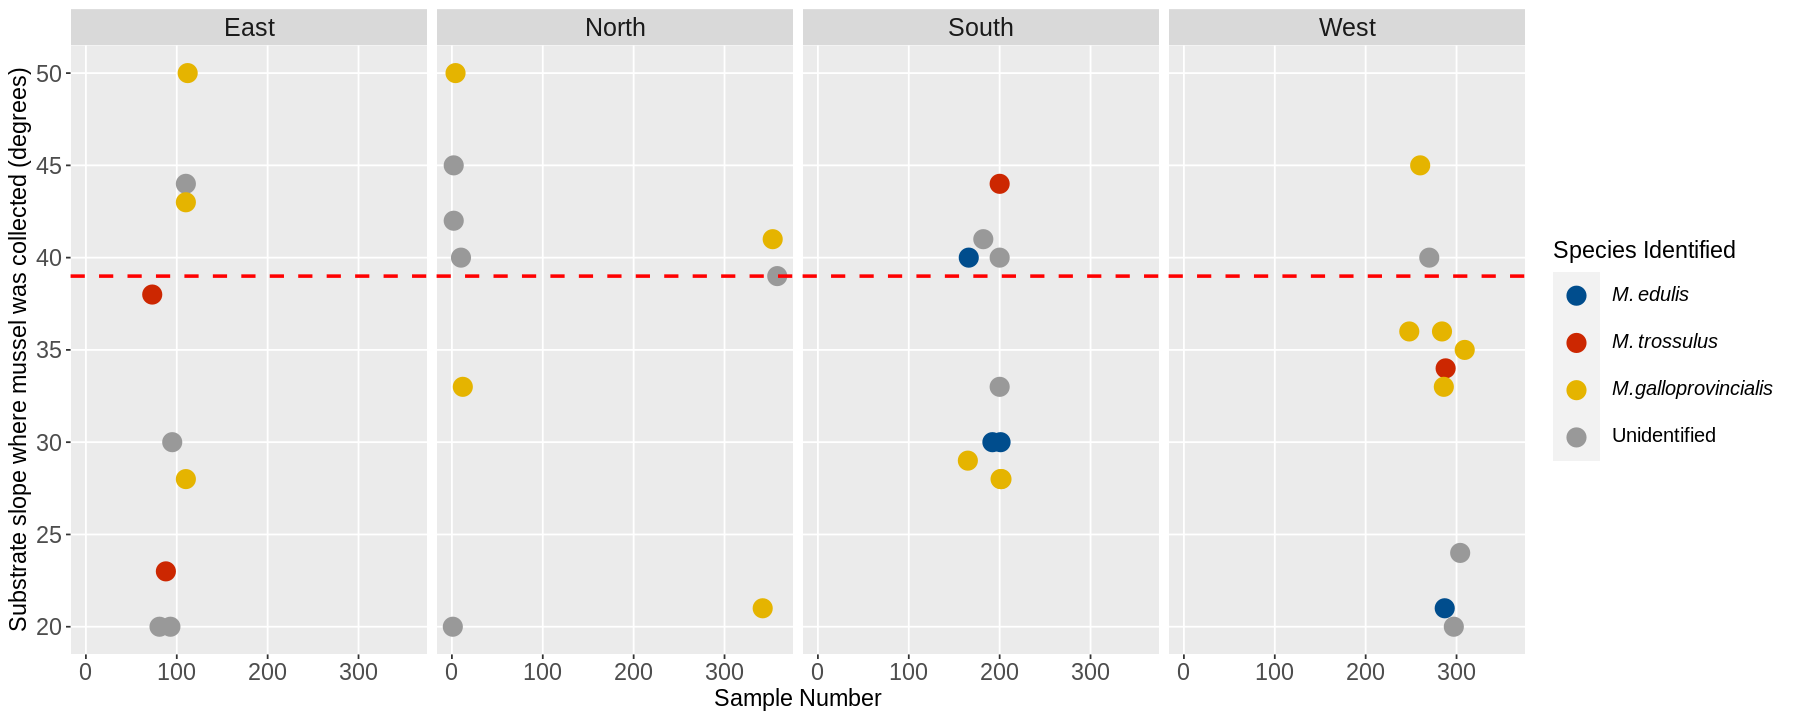

In [16]:
options(repr.plot.width = 15, repr.plot.height = 6, warn = -1) 

tr <- r %>%
    ggplot(aes(x = Aspect.degree, y = Slope.degree, color = SpeciesID)) +
    geom_point(size=5) +
    facet_grid(~GeneralL) + 
    geom_hline(yintercept=39, linetype="dashed", color = "red", size = 1) +
    scale_y_continuous(limits = c(20,50), breaks=seq(20,50,by = 5)) +
    theme(panel.grid.minor = element_blank()) +
    labs(y = "Substrate slope where mussel was collected (degrees)", x = "Sample Number", color = "Species Identified") +
    scale_color_manual(values = col, labels = c("*M. edulis*", "*M. trossulus*", "*M.galloprovincialis*", "Unidentified")) +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14, family="arial"), legend.text = ggtext::element_markdown(size=12, family="arial"),
          axis.text=element_text(size=14, family="arial"), axis.title=element_text(size=14, family="arial"), strip.text.x = element_text(size = 15)) 


tr

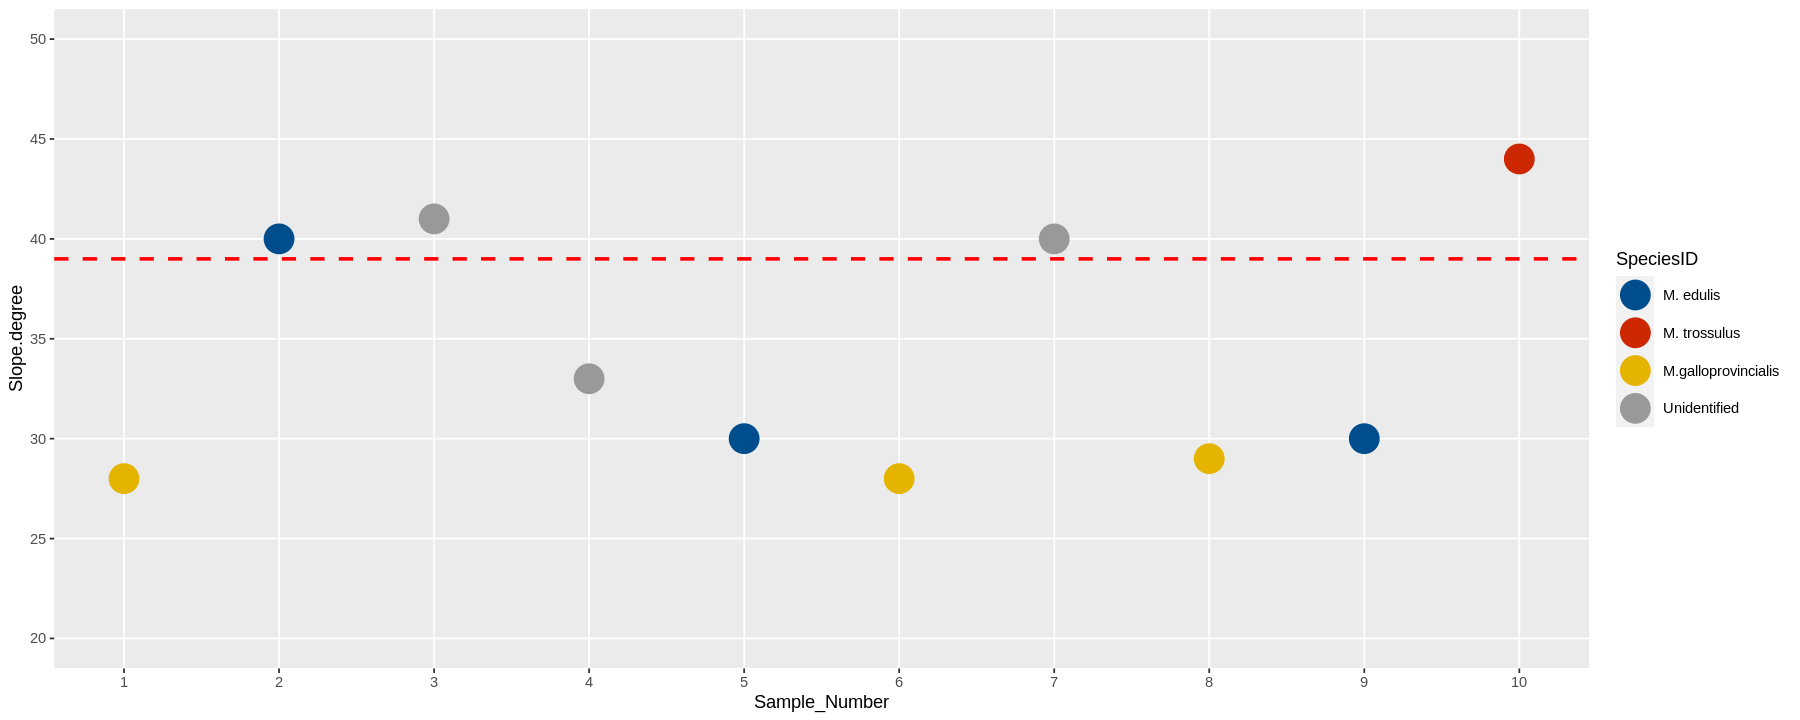

In [17]:
newfig2datasouth1 <- Df %>%
    select(GeneralL, LabelID, SpeciesID, Slope.degree) %>%
    filter(GeneralL == 'South') 

newfig2datasouth1$Sample_Number <- c(1:10)

slopevsaspectscatter <- newfig2datasouth1 %>%
    ggplot() +
    scale_color_manual(values = col) + 
    geom_point(aes(x = Sample_Number, y = Slope.degree, color = SpeciesID), size=8) +
    geom_hline(yintercept=39, linetype="dashed", color = "red", size = 1) +
    scale_x_continuous(limits = c(1,10), breaks=seq(1,10,by = 1)) +
    scale_y_continuous(limits = c(20,50), breaks=seq(20,50,by = 5)) +
    theme(panel.grid.minor = element_blank())

slopevsaspectscatter

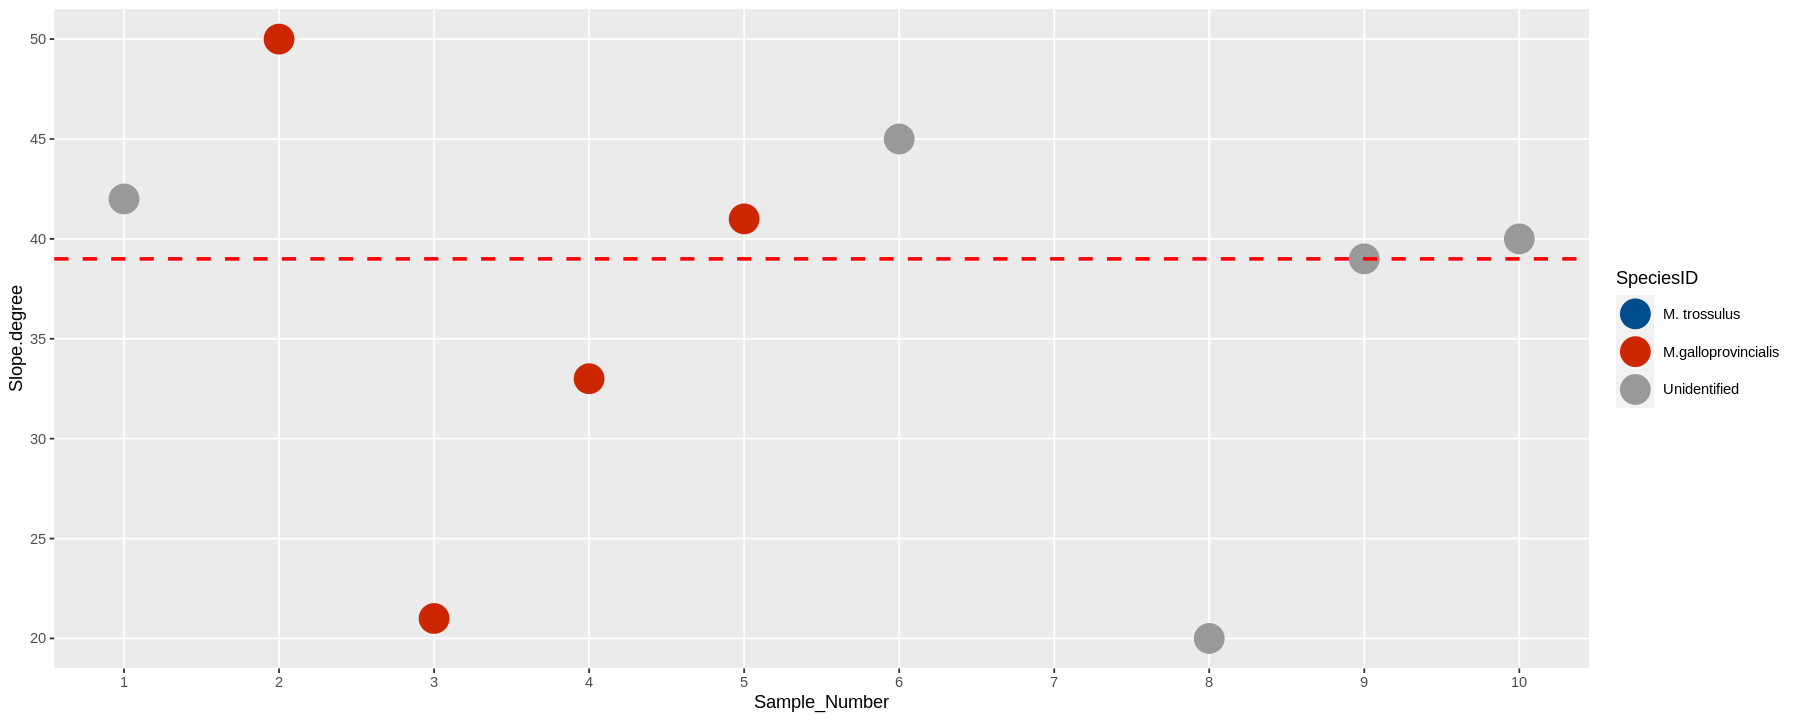

In [18]:
colN <- c("#004d8d", "#cc2701", "#999999")
newfig2datanorth1 <- Df %>%
    select(GeneralL, LabelID, SpeciesID, Slope.degree) %>%
    filter(GeneralL == 'North') 

newfig2datanorth1$Sample_Number <- c(1:10)

newfig2datanorth <- newfig2datanorth1 %>%
    ggplot() +
    geom_point(aes(x = Sample_Number, y = Slope.degree, color = SpeciesID), size=8) +
    scale_color_manual(values = colN) + 
    geom_hline(yintercept=39, linetype="dashed", color = "red", size = 1) +
    scale_x_continuous(limits = c(1,10), breaks=seq(1,10,by = 1)) +
    scale_y_continuous(limits = c(20,50), breaks=seq(20,50,by = 5)) +
    theme(panel.grid.minor = element_blank())

newfig2datanorth

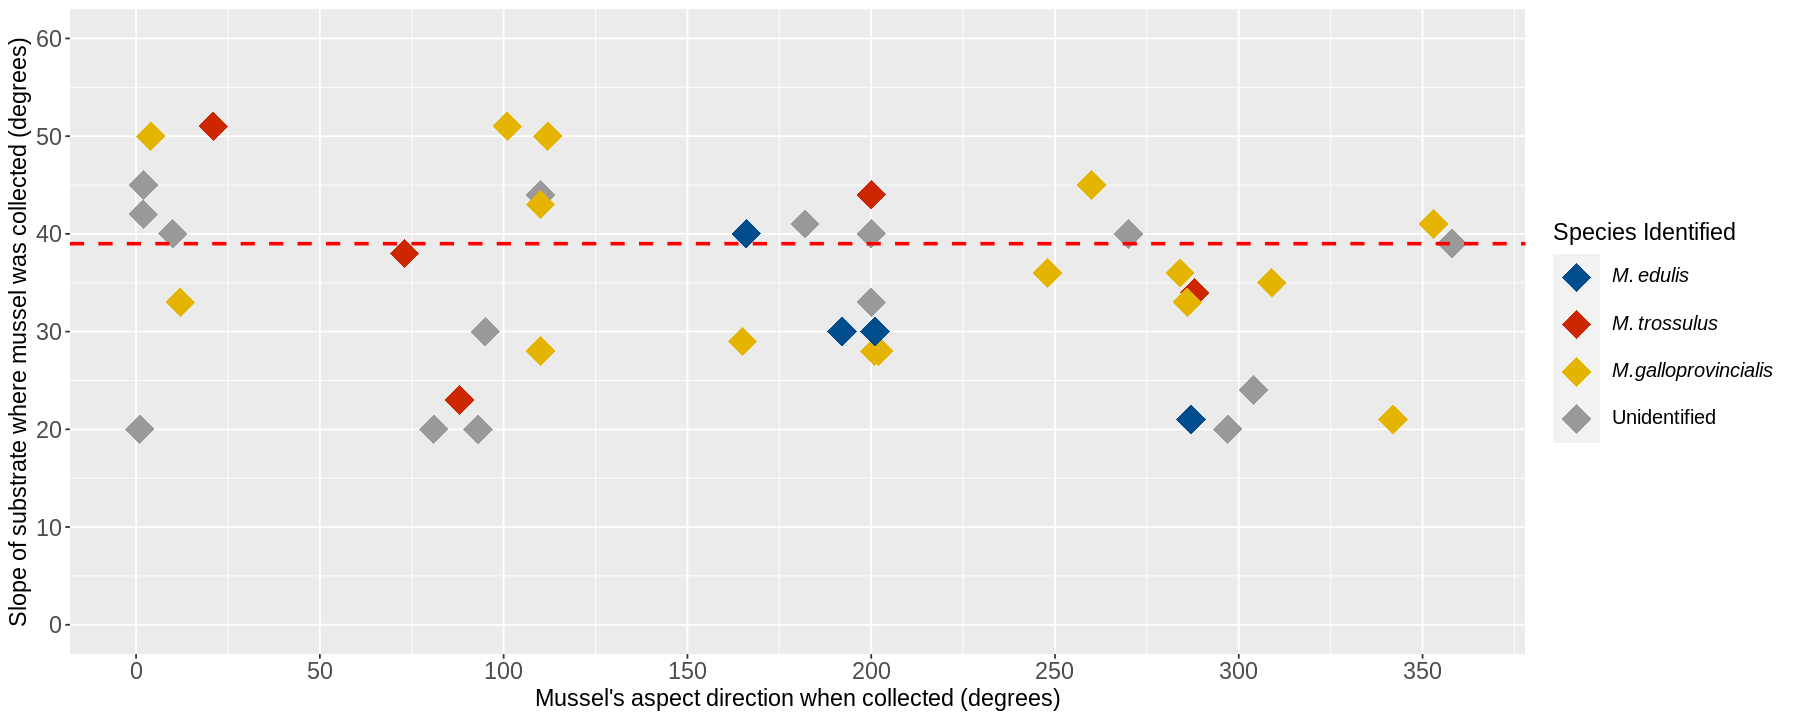

In [19]:
slopevsaspectscatter <- Df %>%
    ggplot() +
    geom_point(aes(x = Aspect.degree, y = Slope.degree, color = SpeciesID), size=8, shape=18) +
    scale_color_manual(values = col, labels = c("*M. edulis*", "*M. trossulus*", "*M.galloprovincialis*", "Unidentified")) + 
    geom_hline(yintercept=39, linetype="dashed", color = "red", size = 1) +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14, family="arial"), legend.text = ggtext::element_markdown(size=12, family="arial"),
    axis.text=element_text(size=14, family="arial"), axis.title=element_text(size=14, family="arial")) +
    scale_y_continuous(limits = c(0,60), breaks=seq(0,60,10)) +
    scale_x_continuous(limits = c(0,360), breaks=seq(0,360,50)) +
    labs(y = "Slope of substrate where mussel was collected (degrees)", x = "Mussel's aspect direction when collected (degrees)", color = "Species Identified")

slopevsaspectscatter

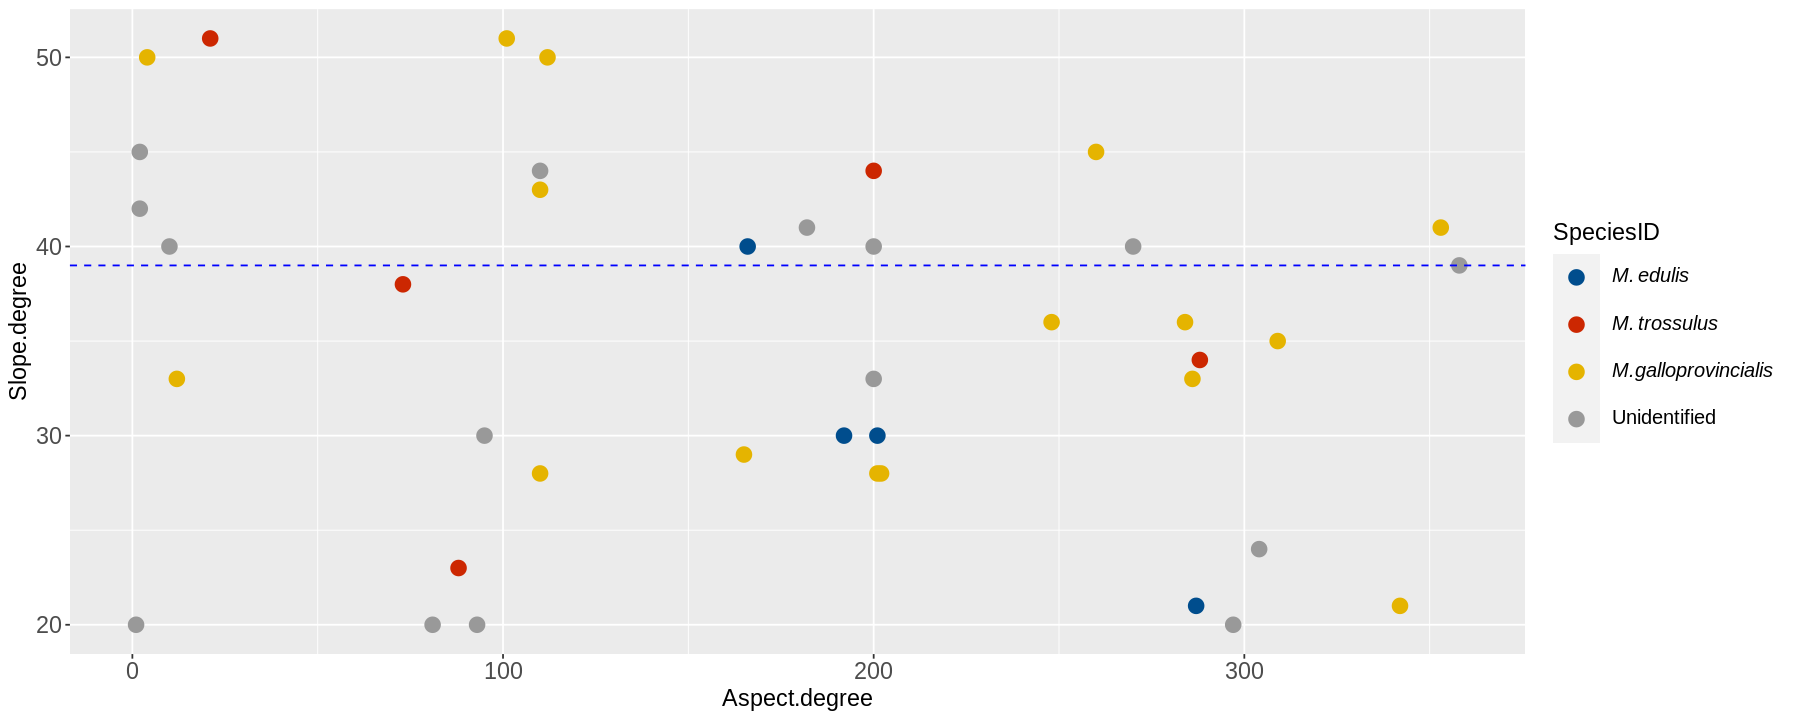

In [20]:
slopevsaspectscatterb <- Df %>%
    ggplot() +
    geom_point(aes(x = Aspect.degree, y = Slope.degree, color = SpeciesID), size=4) +
    scale_color_manual(values = col, labels = c("*M. edulis*", "*M. trossulus*", "*M.galloprovincialis*", "Unidentified")) + 
    geom_hline(yintercept=39, linetype="dashed", color = "blue") +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14, family="arial"), legend.text = ggtext::element_markdown(size=12, family="arial"),
          axis.text=element_text(size=14, family="arial"), axis.title=element_text(size=14, family="arial")) 

slopevsaspectscatterb

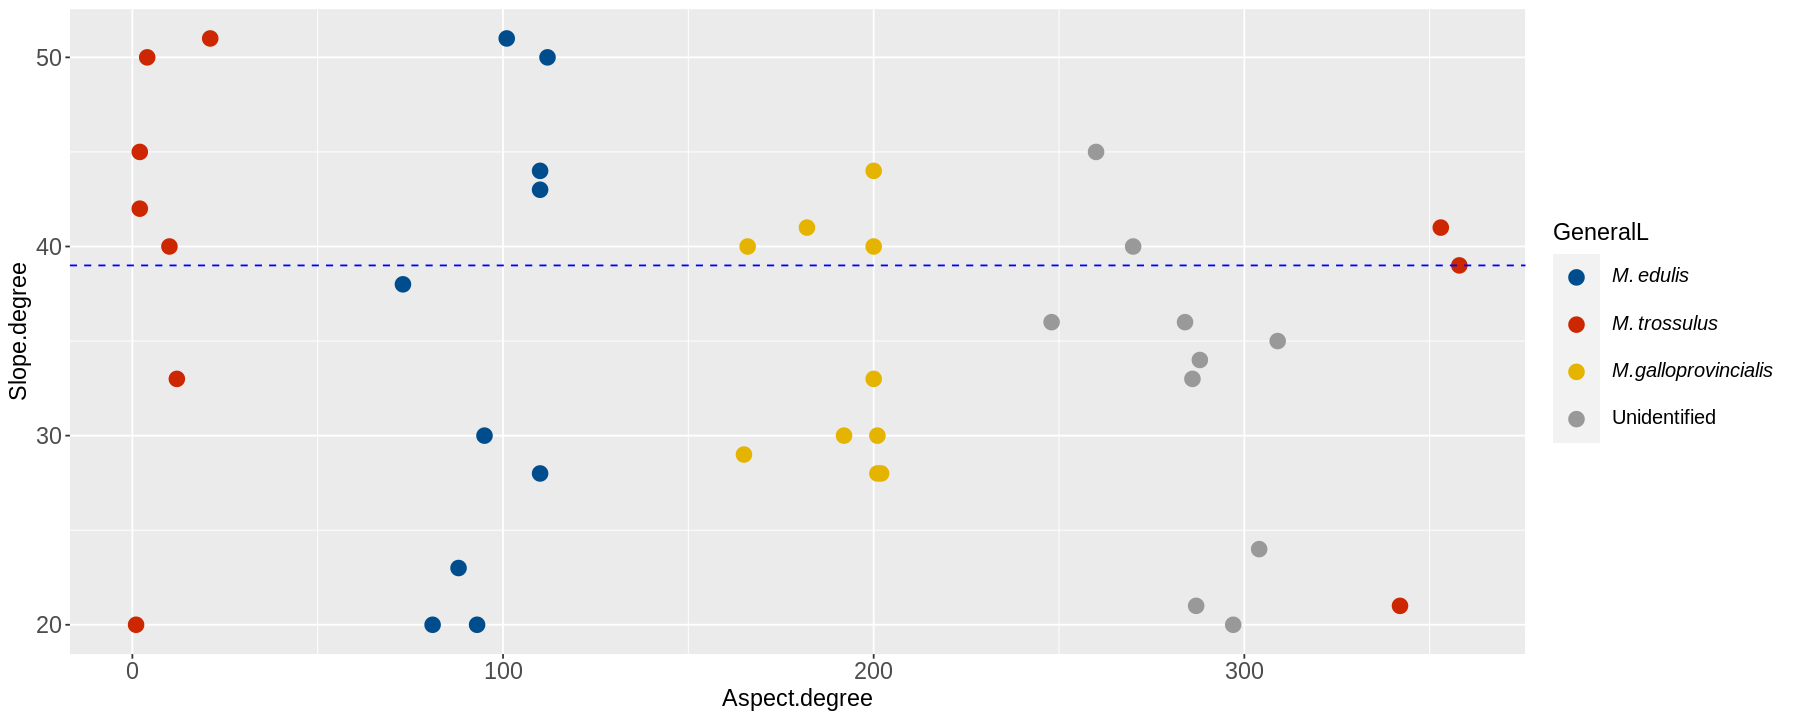

In [21]:
slopevsaspectscatterb <- Df %>%
    ggplot() +
    geom_point(aes(x = Aspect.degree, y = Slope.degree, color = GeneralL), size=4) +
    scale_color_manual(values = col, labels = c("*M. edulis*", "*M. trossulus*", "*M.galloprovincialis*", "Unidentified")) + 
    geom_hline(yintercept=39, linetype="dashed", color = "blue") +
    theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=14, family="arial"), legend.text = ggtext::element_markdown(size=12, family="arial"),
          axis.text=element_text(size=14, family="arial"), axis.title=element_text(size=14, family="arial")) 

slopevsaspectscatterb